# Proyecto Analisis Estadistico de Peliculas

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Configurar estilo de gráficos
sns.set(style="whitegrid")

In [2]:
# Cargar el dataset
data = pd.read_csv('data/tmdb_5000_movies.csv')

In [20]:
# Vista inicial
print("Primeras 5 filas del dataset:")
data.head()


Primeras 5 filas del dataset:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [21]:
print("\nInformación del dataset:")
data.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 


In [22]:
print("\nDimensiones del dataset:", data.shape)


Dimensiones del dataset: (4803, 20)


In [23]:
# Ver valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())


Valores faltantes por columna:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [ ]:
# Seleccionar columnas clave para análisis
columns_of_interest = ['budget', 'genres', 'popularity', 'revenue', 'runtime', 
                      'vote_average', 'vote_count', 'release_year']

# Convertir 'release_year' a tipo datetime si no existe
if 'release_year' not in data.columns:
    data['release_year'] = pd.to_datetime(data['release_date']).dt.year

# Crear un nuevo DataFrame con las columnas de interés    
data_subset = data[columns_of_interest]

# Eliminar filas con valores faltantes 
data_subset = data_subset.dropna(subset=['release_year'])

#Manejar valores ceros
data_subset1 = data_subset[(data_subset['budget'] > 0) & (data_subset['revenue'] > 0)]  # Selección de filas con valores mayores a cero

print(data_subset.shape)
print(data_subset1.shape)

(4802, 8)
(3229, 8)


### Distribucion de calificaciones 

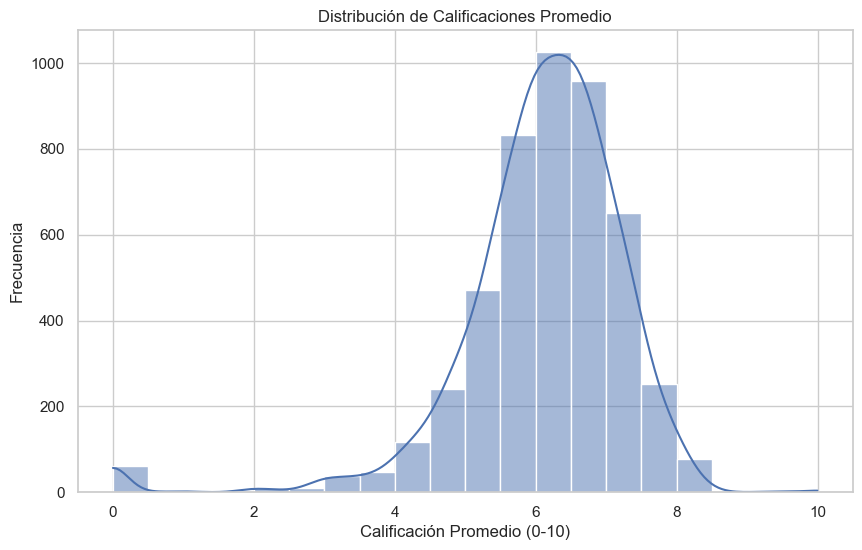

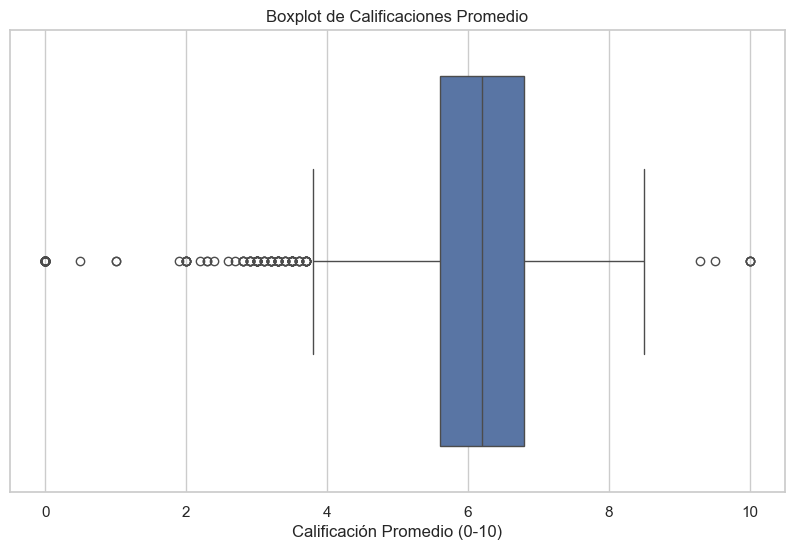

In [25]:
# Histograma de calificaciones
plt.figure(figsize=(10, 6))
sns.histplot(data_subset['vote_average'], bins=20, kde=True)
plt.title('Distribución de Calificaciones Promedio')
plt.xlabel('Calificación Promedio (0-10)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de calificaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_subset['vote_average'])
plt.title('Boxplot de Calificaciones Promedio')
plt.xlabel('Calificación Promedio (0-10)')
plt.show()

Podemos observar que la media de calificaciones se encuentre aproximadamente en 6.25, y podemos ver que hay varios datos atipicos debajo de 4 y muy pocos arriba de 8

### Generos mas populares

In [46]:
#Funcion para extraer generos
def extract_genres(genres):
    try:
        genres = json.loads(genres)
        return [i['name'] for i in genres]
    except:
        return []

#Crear columna con lista de generos
data_subset1['genres_list'] = data_subset1['genres'].apply(extract_genres)
all_genres = data_subset1['genres_list'].explode().dropna()
genre_counts = all_genres.value_counts()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17372\1161127086.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset1['genres_list'] = data_subset1['genres'].apply(extract_genres)


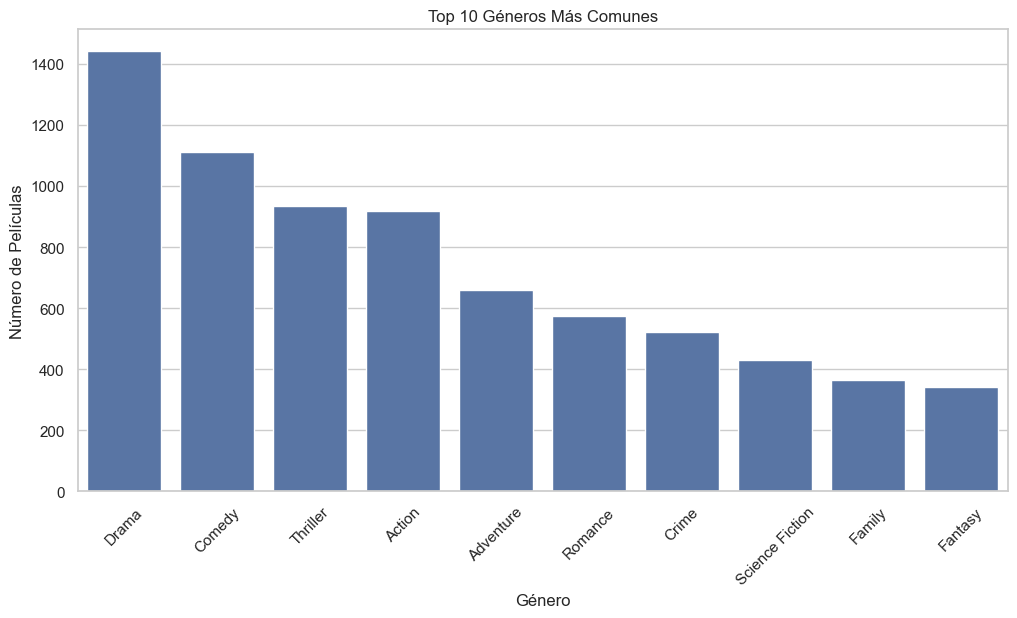

In [47]:
# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10])
plt.title('Top 10 Géneros Más Comunes')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

Los generos de drama, comedia y suspenson son los 3 principales generos que tienen la peliculas

### Relación entre presupuesto e ingresos

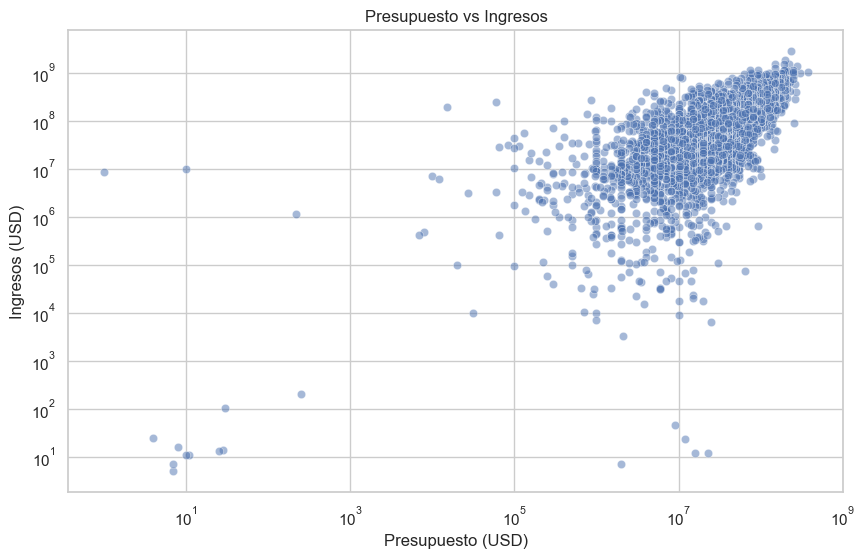

In [49]:
# Scatter plot: Presupuesto vs Ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=data_subset, alpha=0.5)
plt.title('Presupuesto vs Ingresos')
plt.xlabel('Presupuesto (USD)')
plt.ylabel('Ingresos (USD)')
plt.xscale('log')  # Escala logarítmica por valores extremos
plt.yscale('log')
plt.show()

Podemos observar que a hay una tendencia que a mayor presupuesto son mayores los ingresos aunque hay algunas excepciones

### Calificaciones vs Popularidad

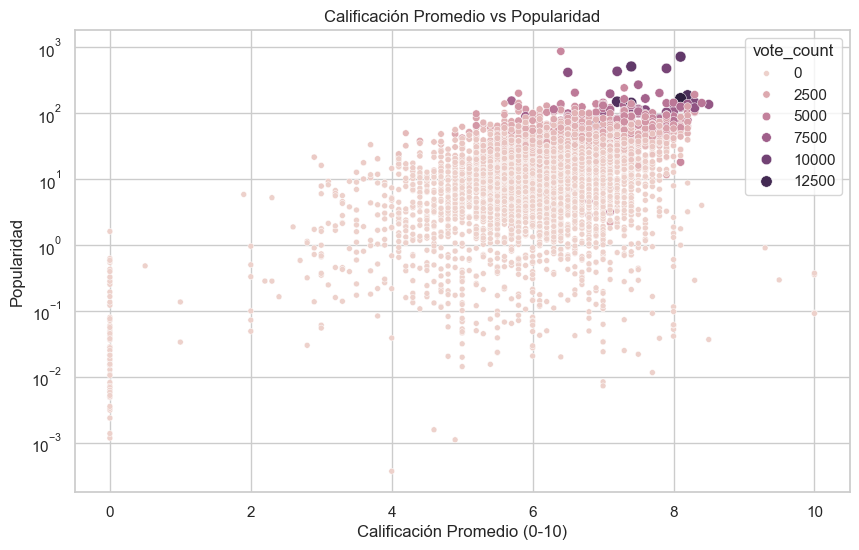

In [52]:
# Scatter plot: Calificación vs Popularidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='popularity', data=data_subset, hue='vote_count', size='vote_count')
plt.title('Calificación Promedio vs Popularidad')
plt.xlabel('Calificación Promedio (0-10)')
plt.ylabel('Popularidad')
plt.yscale('log')  # Escala logarítmica para popularidad
plt.show()

Vemos una corelacion positiva entre popularidad y calificacion promedio, tambien podemos ver que a mayor votos es mayor la popularidad

### Tendencias a lo largo del tiempo

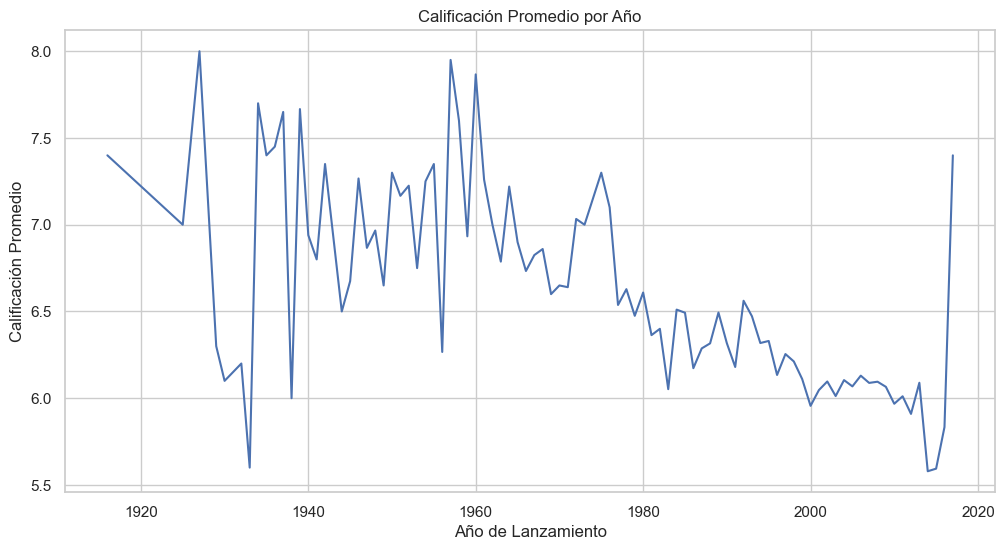

In [53]:
# Promedio de calificaciones por año
yearly_avg = data_subset.groupby('release_year')['vote_average'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title('Calificación Promedio por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Calificación Promedio')
plt.show()

Podemos ver un declive de las calificaciones promedio apartir de las peliculas de 1960 y despues una alza en los años 2010 